В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler

clients_df = pd.read_csv('csv/train.csv')

clients_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [62]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


Мені не подобається, що CustomerId - це float, тому я зміню його на int.

In [63]:
# clients_df['CustomerId'] = clients_df['CustomerId'].astype(int)
clients_df.drop(['CustomerId'], axis=1, inplace=True)
clients_df.head()

,id,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0


In [64]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 1.5+ MB


In [65]:
use_sample = False

train_val_df, test_df = train_test_split(clients_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(clients_df, test_size=0.25, random_state=42)

In [66]:
print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape:', test_df.shape)

train_df.shape: (11250, 13)
val_df.shape: (3750, 13)
test_df.shape: (3000, 13)


2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [67]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'Exited'

print(input_cols)
print(target_col)

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
Exited


3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [68]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols, categorical_cols

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Surname', 'Geography', 'Gender'])

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

****Пройдуся по колонкам по порядку.****

Почну з колонки `Surname`

Ця колонка містить прізвища клієнтів.
Підказка від CahtGPT o1 наступна:

Using bank clients’ surnames in a machine learning model is generally not recommended, and in many cases, may be inappropriate or even legally problematic. Here are several considerations:


1. Privacy & Compliance
	•	Personally Identifiable Information (PII): A surname can be considered PII, especially if paired with other attributes (e.g., account details, address). Collecting or using it for modeling could violate privacy regulations (GDPR in the EU, various data protection laws in other regions) unless you have explicit consent and a legally valid reason.
	•	Data Minimization Principle: Many privacy regulations encourage collecting and using only the data that is strictly necessary for the stated purpose. If surnames aren’t strictly necessary, including them can contravene these principles.

2. Potential for Bias & Discrimination
	•	Ethical Risks: A surname can be correlated with ethnicity, religion, or region of origin. This can inadvertently introduce bias into your model. Even if your model’s goal is purely predictive (e.g., credit risk, churn), the presence of sensitive data could lead to discriminatory outcomes.
	•	Regulatory Oversight: In many jurisdictions, using features that might enable direct or proxy discrimination (e.g., race, nationality, religious background) can be subject to strict regulations.

3. Limited Predictive Value
	•	No Strong Signal: In most banking/financial contexts, a surname rarely offers a stable, causal link to a business or risk-related metric. You might see spurious correlations, but these are not robust or ethically valid signals for a model.
	•	Feature Engineering: Typically, data such as account history, transaction patterns, income, credit history, etc., provide more direct and meaningful predictive power. Relying on surnames is rarely beneficial and can degrade the model’s ethical and legal standing.

4. Best Practices & Alternatives
	1.	Remove or Anonymize: In many data pipelines, personally identifiable information—like full names—should be hashed or removed entirely before training.
	2.	Focus on Relevant Attributes: Use demographic or behavioral features that are both lawful to use and predictively relevant (e.g., credit score, transaction frequency).
	3. Compliance Check: Always consult with legal and compliance teams if you’re unsure about using a particular feature to ensure it meets all applicable regulatory requirements.

Summary

While there is no absolute technical barrier to including surnames in a dataset, it is almost always inadvisable for privacy, ethical, and regulatory reasons. If you do incorporate such data, you should carefully consider why it is necessary, confirm it is legally permitted, and account for potential bias that it might introduce. A far safer (and typically more effective) approach is to use non-personal, relevant features that align with both data protection laws and ethical modeling standards.

Я прислухаюсь до поради. Бо на роботі вже не раз стикався з тим, що персональні дані клієнтів не можна ніде зберігати та кому-небудь передавати.

In [69]:
if 'Surname' in train_inputs:
    train_inputs.drop(['Surname'], axis=1, inplace=True)
if 'Surname' in val_inputs:
    val_inputs.drop(['Surname'], axis=1, inplace=True)
if 'Surname' in test_inputs:
    test_inputs.drop(['Surname'], axis=1, inplace=True)
if 'Surname' in categorical_cols:
    categorical_cols.remove('Surname')

print(train_inputs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11250 entries, 7410 to 7270
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      11250 non-null  float64
 1   Geography        11250 non-null  object 
 2   Gender           11250 non-null  object 
 3   Age              11250 non-null  float64
 4   Tenure           11250 non-null  float64
 5   Balance          11250 non-null  float64
 6   NumOfProducts    11250 non-null  float64
 7   HasCrCard        11250 non-null  float64
 8   IsActiveMember   11250 non-null  float64
 9   EstimatedSalary  11250 non-null  float64
dtypes: float64(8), object(2)
memory usage: 966.8+ KB
None


****Переходимо до колонок `Gender` та `Geography`****

In [70]:
train_inputs['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Є тільки 2 поли: Чоловічий та жіночий

In [71]:
train_inputs['Geography'].unique()

array(['Germany', 'France', 'Spain'], dtype=object)

Як бачимо тут тільки 3 унікальних значення. Тому можемо використати OneHotEncoder

In [72]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train_inputs[categorical_cols])

encoder.categories_

[array(['France', 'Germany', 'Spain'], dtype=object),
 array(['Female', 'Male'], dtype=object)]

In [73]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [74]:
encoder.transform(train_inputs[categorical_cols])[:10]

array([[0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [75]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

# Також приберу оригінальні колонки, щоб вони не заважали навчанню моделі
if 'Geography' in train_inputs:
    train_inputs.drop(['Geography'], axis=1, inplace=True)
if 'Geography' in val_inputs:
    val_inputs.drop(['Geography'], axis=1, inplace=True)
if 'Geography' in test_inputs:
    test_inputs.drop(['Geography'], axis=1, inplace=True)

if 'Gender' in train_inputs:
    train_inputs.drop(['Gender'], axis=1, inplace=True)
if 'Gender' in val_inputs:
    val_inputs.drop(['Gender'], axis=1, inplace=True)
if 'Gender' in test_inputs:
    test_inputs.drop(['Gender'], axis=1, inplace=True)

pd.set_option('display.max_columns', None)
train_inputs

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7410,669.0,29.0,6.0,125961.74,2.0,1.0,0.0,158887.09,0.0,1.0,0.0,1.0,0.0
10894,818.0,28.0,7.0,0.00,2.0,1.0,0.0,102908.96,1.0,0.0,0.0,0.0,1.0
1934,591.0,34.0,7.0,0.00,2.0,1.0,1.0,120852.85,1.0,0.0,0.0,1.0,0.0
11539,554.0,35.0,3.0,0.00,2.0,1.0,1.0,9984.40,0.0,0.0,1.0,0.0,1.0
2952,663.0,39.0,8.0,0.00,2.0,1.0,0.0,123982.02,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,589.0,29.0,8.0,151607.56,1.0,1.0,0.0,90888.86,0.0,0.0,1.0,0.0,1.0
13418,615.0,31.0,5.0,145973.88,2.0,1.0,1.0,65612.12,0.0,1.0,0.0,0.0,1.0
5390,703.0,33.0,1.0,116947.76,2.0,1.0,0.0,134600.94,0.0,1.0,0.0,1.0,0.0
860,597.0,31.0,10.0,123870.07,1.0,1.0,1.0,161519.77,1.0,0.0,0.0,0.0,1.0


Тепер перейдемо до колонки `CreditScore`

In [79]:
train_inputs['CreditScore']

7410     669.0
10894    818.0
1934     591.0
11539    554.0
2952     663.0
         ...  
5191     589.0
13418    615.0
5390     703.0
860      597.0
7270     542.0
Name: CreditScore, Length: 11250, dtype: float64

Побудуємо графік розподілу цієї величини.

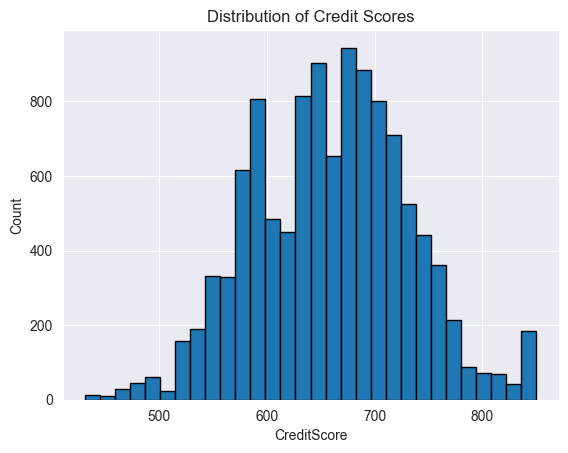

In [86]:
plt.hist(train_inputs['CreditScore'], bins=30, edgecolor='black')
plt.xlabel('CreditScore')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
plt.show()

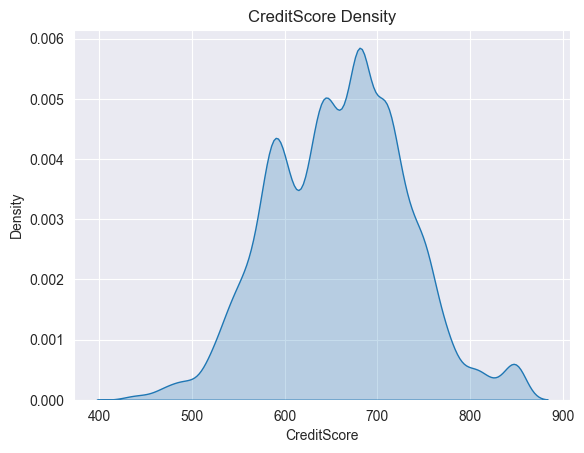

In [87]:
sns.kdeplot(data=train_inputs, x='CreditScore', shade=True)
plt.title('CreditScore Density')
plt.show()

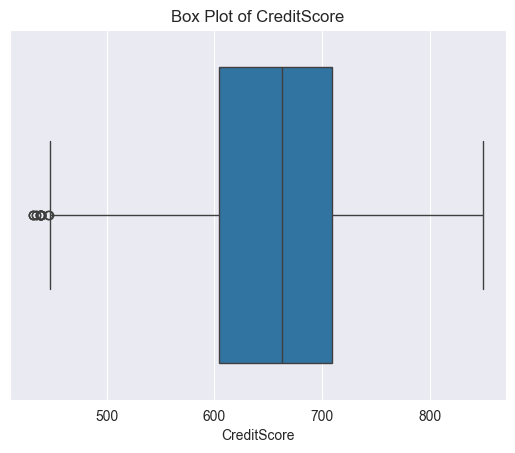

In [85]:
sns.boxplot(data=train_inputs, x='CreditScore')
plt.title('Box Plot of CreditScore')
plt.show()

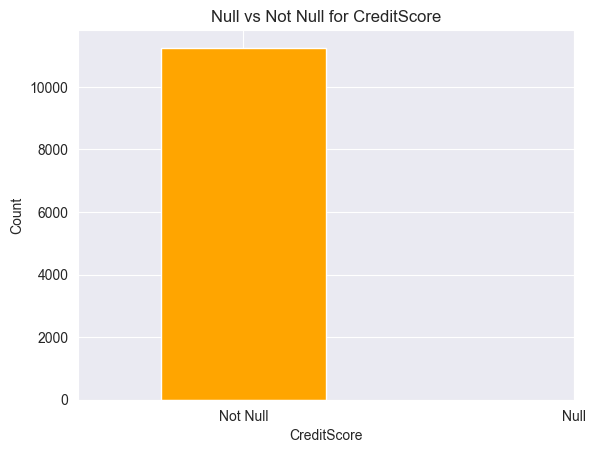

In [88]:
# Step 1: Create a boolean Series: True if CreditScore is null, else False
credit_null = train_inputs['CreditScore'].isnull()

# Step 2: Convert that to counts
counts = credit_null.value_counts()  # how many True, how many False

# Step 3: Plot as a simple bar chart
counts.plot(kind='bar', color=['orange','green'])
plt.xticks([0,1], ['Not Null', 'Null'], rotation=0)  # rename ticks for clarity
plt.title('Null vs Not Null for CreditScore')
plt.ylabel('Count')
plt.show()

Як бачимо, розподіл CreditScore відповідає нормальному з невеликими викидами. Нульових значень немає

Тому можемо виконати нормалізацію колонки.

In [ ]:
# scaler = StandardScaler()
# scaler.fit(train_inputs['CreditScore'])
#
# train_inputs['CreditScore_scaled'] = scaler.fit_transform(df[['CreditScore']])

5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [76]:
# def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
#     input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
#     input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
#     X_input = input_df[numeric_cols + encoded_cols]
#     prob = model.predict_proba(X_input)[:,1]
#     return prob

In [77]:
# predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.